In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import scipy.interpolate

# Make some fake data and organize into a single dataframe

### Make the fake data

In [64]:
t_sensor_1 = np.arange(0, 10, 0.07) + np.random.normal(0, 0.005) # add a little noise to the time for fun
t_sensor_2 = np.arange(0.075, 10+0.075, 0.2) + np.random.normal(0, 0.01)

sensor_1 = np.sin(t_sensor_1)
sensor_2 = t_sensor_2*np.sin(t_sensor_2)

Text(0, 0.5, 'sensor 1')

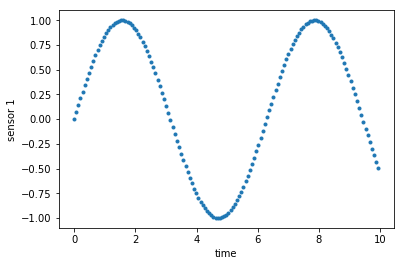

In [65]:
plt.plot(t_sensor_1, sensor_1, '.')
plt.xlabel('time')
plt.ylabel('sensor 1')

Text(0, 0.5, 'sensor 2')

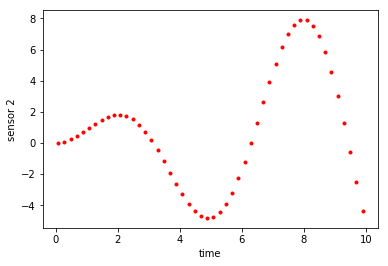

In [66]:
plt.plot(t_sensor_2, sensor_2, '.', color='red')
plt.xlabel('time')
plt.ylabel('sensor 2')

Text(0, 0.5, 'sensor 2')

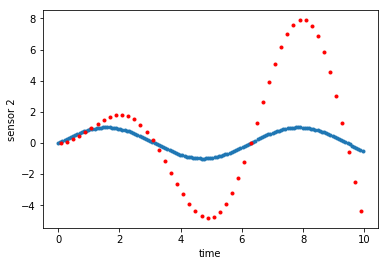

In [67]:
plt.plot(t_sensor_1, sensor_1, '.')
plt.xlabel('time')
plt.ylabel('sensor 1')

plt.plot(t_sensor_2, sensor_2, '.', color='red')
plt.xlabel('time')
plt.ylabel('sensor 2')

### Put it in a pandas dataframe

In [68]:
df_1 = pandas.DataFrame({'t_sensor_1': t_sensor_1,
                         'sensor_1': sensor_1,
                  })

df_2 = pandas.DataFrame({'t_sensor_2': t_sensor_2,
                         'sensor_2': sensor_2,
                  })

In [69]:
# combine the two sensor dataframes into one dataframe, and add a universal time
df = pandas.concat([df_1, df_2], sort=True)

combined_time = np.hstack([t_sensor_1, t_sensor_2])
df['time'] = combined_time
df = df.sort_values(by=['time'])

In [70]:
df

,sensor_1,sensor_2,t_sensor_1,t_sensor_2,time
0,0.000427,NaN,0.000427,NaN,0.000427
1,0.070369,NaN,0.070427,NaN,0.070427
0,NaN,0.007282,NaN,0.085388,0.085388
2,0.139966,NaN,0.140427,NaN,0.140427
3,0.208877,NaN,0.210427,NaN,0.210427
...,...,...,...,...,...
139,-0.300912,NaN,9.730427,NaN,9.730427
140,-0.366876,NaN,9.800427,NaN,9.800427
141,-0.431043,NaN,9.870427,NaN,9.870427
49,NaN,-4.393999,NaN,9.885388,9.885388


# Interpolate everything to the same time base

### Make master time

Choose a master time closest to the sensor that you want to interpolate the least, e.g. the least predictable and most critical sensor. Hopefully that is also one of the faster sensors.

In [87]:
# average time step for sensor 1
dt_sensor_1 = np.median(np.diff(df['t_sensor_1'].dropna().values))
print('dt sensor 1: ', dt_sensor_1)

dt_sensor_2 = np.median(np.diff(df['t_sensor_2'].dropna().values))
print('dt sensor 2: ', dt_sensor_2)

dt sensor 1:  0.07000000000000028
dt sensor 2:  0.20000000000000018


In [88]:
# create master time
# master time should start with a value larger  than the largest  first value of the two sensors
# master time should end   with a value smaller than the smallest last  value of the two sensors
first_time = np.max([df['t_sensor_1'].min(), df['t_sensor_2'].min()])
last_time = np.min([df['t_sensor_1'].max(), df['t_sensor_2'].max()])
master_time = np.arange(first_time, last_time, dt)

### Interpolate

In [89]:
# create interpolation function and inteprolate sensor 1
df_sensor_1 = df[['t_sensor_1', 'sensor_1']].dropna()
func_interp_sensor_1 = scipy.interpolate.interp1d(df_sensor_1.t_sensor_1, df_sensor_1.sensor_1)
interp_sensor_1 = func_interp_sensor_1(master_time)

In [95]:
# create interpolation function and inteprolate sensor 2
df_sensor_2 = df[['t_sensor_2', 'sensor_2']].dropna()
func_interp_sensor_2 = scipy.interpolate.interp1d(df_sensor_2.t_sensor_2, df_sensor_2.sensor_2, 
                                                  kind='cubic')
interp_sensor_2 = func_interp_sensor_2(master_time)

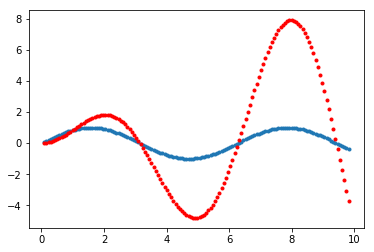

In [96]:
plt.plot(master_time, interp_sensor_1, '.')
plt.plot(master_time, interp_sensor_2, '.', color='red')

### Combine into a new dataframe

In [97]:
new_df = pandas.DataFrame({'master_time': master_time,
                           'sensor_1': interp_sensor_1,
                           'sensor_2': interp_sensor_2})

In [98]:
new_df

,master_time,sensor_1,sensor_2
0,0.085388,0.085243,0.007282
1,0.155388,0.154694,0.023879
2,0.225388,0.223387,0.050272
3,0.295388,0.290986,0.086004
4,0.365388,0.357159,0.130620
...,...,...,...
135,9.535388,-0.110333,-1.052571
136,9.605388,-0.179550,-1.725438
137,9.675388,-0.247887,-2.399451
138,9.745388,-0.315010,-3.071172
